# Plotting with Pandas and Matplotlib

-----

### Learning Objectives
*After this lesson, you will be able to:*
- Implement different types of plots on a given dataset.
# @lookingfw
<!--
Talking points:
We will use Pandas and Matplotlib to create simple plots.
We'll cover plotting line plots, scatter plots, bar plots, and histograms, and a brief introduction on how to manipulate the style of your plots with Matplotlib.
-->

---------

## Recap

In the last lesson, we learned about when to use the different types of plots. Can anyone give an example of when we would use a:
 * line plot?
 * bar plot?
 * histogram?
 * scatter plot?

### Pandas and Matplotlib

<!--
Talking points:
In this lesson, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.
-->

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

*Sometimes Pandas can be a little frustrating... perserverence is key!*

<img src="https://media.giphy.com/media/EPcvhM28ER9XW/giphy.gif" width="200" align="left">

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

## Plotting with Pandas: How?

`<data_set>.<columns>.plot()`

`population.states.count().plot()` creates:

![](https://exceljet.net/sites/default/files/styles/original_with_watermark/public/images/charttypes/line%20chart2.png?itok=lG1hqRu4)

## Plotting: Visualization Types

Line charts are default.

`# line chart`

`population.states.count().plot()`

For other charts:

`population.states.plot(kind='bar')`

`population.states.plot(kind='hist', bins=3);`

`population.states.plot(kind='scatter', x='states', y='population')`

Let's try!

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Load in data sets for visualization

- [Football Records](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017): International football results from 1872 to 2018
- [Avocado Prices](https://www.kaggle.com/neuromusic/avocado-prices): Historical data on avocado prices and sales volume in multiple US markets
- [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings): Expert ratings of over 1,700 chocolate bars

These are available in Google Classroom for downloading.

In [2]:
pwd

'C:\\Users\\Abdullah\\Desktop\\PythonClassroom'

In [13]:
#if you are reading the files from current active directory
foot = pd.read_csv('international_football_results.csv')
avo = pd.read_csv('avocado.csv')
choc = pd.read_csv('chocolate_ratings.csv')

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---


Let's focus on the football scores for starters.

In [15]:
#review the first few rows of the football data
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


We can extract the year by converting the date to a `datetime64[ns]` object, and then using the `pd.Series.dt.year` property to return the year (as an `int`). Use the following provided link.

In [16]:
#using the panda function "to_datetime" for extracting the year
foot['year'] = pd.to_datetime(foot['date']).dt.year

In [17]:
#print DataFrame showing the original date column along with the year column you created
# foot.head()
foot[['date','year']].head()

,date,year
0,1872-11-30,1872
1,1873-03-08,1873
2,1874-03-07,1874
3,1875-03-06,1875
4,1876-03-04,1876


We can then get the number of games played every year by using `pd.Series.value_counts`, and using the `sort_index()` method to ensure our year is sorted chronologically.

In [18]:
#combine both commands to accomplish the task
foot['year'].value_counts().sort_index().head()
# foot['year'].value_counts().head()

1872    1
1873    1
1874    1
1875    1
1876    2
Name: year, dtype: int64

Using this date, we can use the `pd.Series.plot()` method to graph **count of games** against **year of game**:

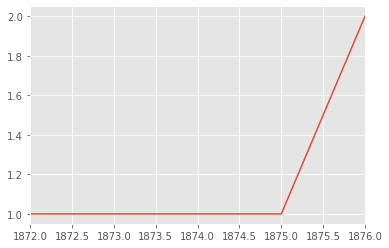

In [19]:
#Add .plot() to creae a line chart ...===>>> because head()
foot['year'].value_counts().sort_index().head().plot()

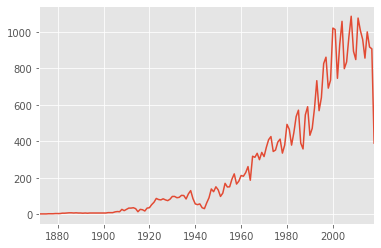

In [20]:
#Add .plot() to creae a line chart 
foot['year'].value_counts().sort_index().plot()

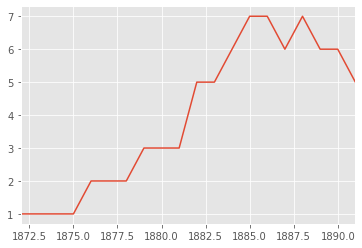

In [21]:
#Add .plot() to creae a line chart 
foot['year'].value_counts().sort_index().head(20).plot()

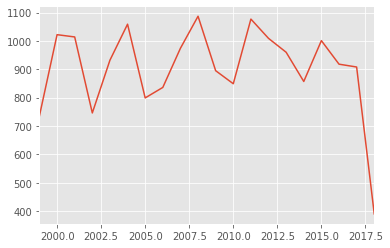

In [22]:
#Add .plot() to creae a line chart 
foot['year'].value_counts().sort_index().tail(20).plot()

### Knowledge Check <img src="http://cdn.shopify.com/s/files/1/1061/1924/products/Up_Pointing_Hand_Emoji_grande.png?v=1480481048" width="30px" align="left">

Why does it make sense to use a line plot for this visualization? 

---

### Another example

---

In [25]:
#Focusing on "home_team" apply the sort_index and value_counts
#commands to create a sorted list of the home_team and counted qty
#Note that output is automatically in descending order
foot['home_team'].sort_index().value_counts().head()

Brazil       552
Argentina    535
Germany      495
Mexico       494
England      483
Name: home_team, dtype: int64

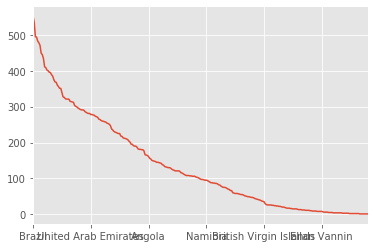

In [26]:
#Focusing on "home_team" apply the sort_index and value_counts
#commands to create a sorted list of the home_team and counted qty
#Note that output is automatically in descending order
foot['home_team'].sort_index().value_counts().plot()

### Knowledge Check <img src="http://cdn.shopify.com/s/files/1/1061/1924/products/Up_Pointing_Hand_Emoji_grande.png?v=1480481048" width="30px" align="left">

Why would it **NOT** make sense to use a line plot for this visualization?

---

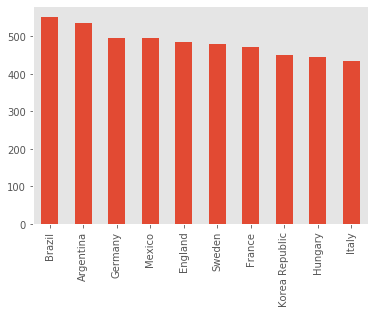

In [30]:
#Focusing on "home_team" apply the sort_index and value_counts
#commands to create a sorted list of the home_team and counted qty
#Note that output is automatically in descending order
foot['home_team'].sort_index().value_counts().head(10).plot(kind='bar', grid=False)

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

Count the number of games played in each country in the football dataset.

In [35]:
#from the football data focus on "country"
#value_counts automatically sorts the values in desc order
foot['country'].value_counts().head()

USA         1087
France       775
England      659
Malaysia     634
Sweden       632
Name: country, dtype: int64

Let's view the same information, but in a bar chart instead. Note we are using `.head()` to return the top 5. Also note that `value_counts()` automatically sorts by the value (read the docs!) Reference info for Colors found at https://matplotlib.org/tutorials/colors/colors.html.

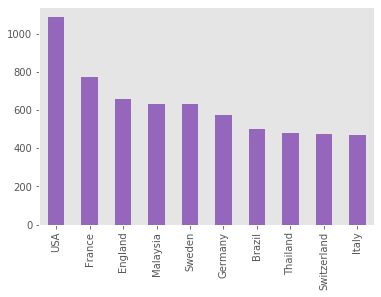

In [38]:
#add .plot(kind='bar', color='tab:purple')
#to create barchart using tableau's purple color pallette
foot['country'].value_counts().head(10).plot(kind='bar',color='tab:purple', grid=False)

In [73]:
#add .plot(kind='bar', color='xkcd:sky blue')
#creating a barchart with a sky blue color choice


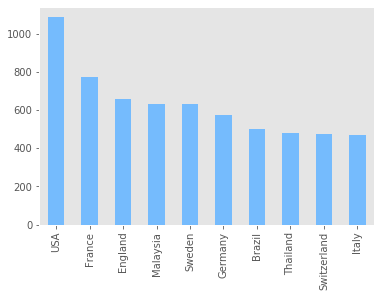

In [39]:
foot['country'].value_counts().head(10).plot(kind='bar',color='xkcd:sky blue', grid=False)

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


Let's change to the chocolate bar dataset.

In [40]:
#show the top of the choc data
#review the story of one row
choc.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


### How would you split the `Rating` values into 3 equally sized bins?

In [41]:
#use the command .unique() to reveal discrete Rating contents
choc['Rating'].unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

Use a histogram! The `bins=n` kwarg allows us to specify the number of bins ('buckets') of values.

In [42]:
#print from choc data the column "REF", which is date field
#Name: REF, Length: 1795, dtype: int64
choc.REF.head()

0    1876
1    1676
2    1676
3    1680
4    1704
Name: REF, dtype: int64

([array([1795.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]),
  array([1944.,  157.,  150.,  176.,  178.,  187.,  191.,  215.,  197.,
          195.])],
 array([1.0000e+00, 1.9610e+02, 3.9120e+02, 5.8630e+02, 7.8140e+02,
        9.7650e+02, 1.1716e+03, 1.3667e+03, 1.5618e+03, 1.7569e+03,
        1.9520e+03]),
 <a list of 2 Lists of Patches objects>)

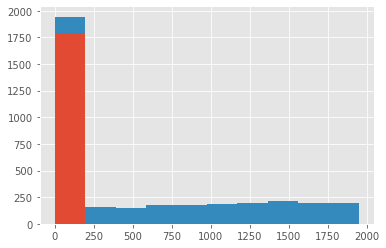

In [43]:
#choc.select_dtypes(include='number')
#for histogram, insert the desired data inside of 
#following format plt.hist([df['Rating'].values, df['REF'].values], stacked=True)
plt.hist([choc['Rating'].values, choc['REF'].values], stacked=True)

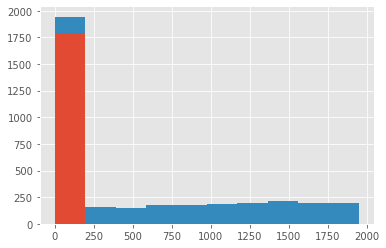

In [45]:
#choc.select_dtypes(include='number')
#for histogram, insert the desired data inside of 
#following format plt.hist([df['Rating'].values, df['REF'].values], stacked=True)
plt.hist([choc['Rating'].values, choc['REF'].values], stacked=True)
plt.show() # not showing extra above

In [78]:
#Create a histogram of chocolate Ratings using only 3 bins


Sometimes it is helpful to increase this number if you think you might have an outlier or a zero-weighted set.

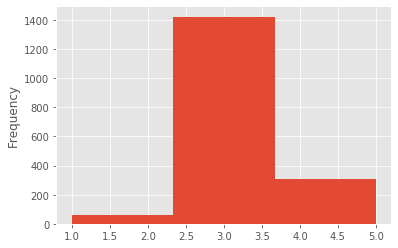

In [46]:
#Increase number of bins to 20 and add labels
#for labels use plt.xlabel, plt.ylabel, plt.title
choc['Rating'].plot(kind='hist', bins=3)
plt.show()

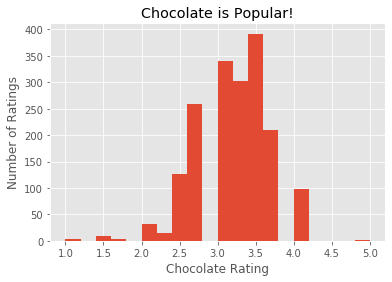

In [53]:
#Increase number of bins to 20 and add labels
#for labels use plt.xlabel, plt.ylabel, plt.title
choc['Rating'].plot(kind='hist', bins=20)
plt.ylabel('Number of Ratings')
plt.xlabel('Chocolate Rating')
plt.title('Chocolate is Popular!')
plt.show()

### Knowledge check: 
What does the y-axis represent on a histogram? What about the x-axis? How would you explain a histogram to a non-technical person?

### Making histograms of an entire dataframe:

In [80]:
#Add .hist(figsize=(16,8)) to the DataFrame name


### Why doesn't it make plots of ALL the columns in the dataframe?

Hint: what is different about the columns it plots vs. the ones it left out?

In [81]:
#use .head(3) to evaluate choc data

Let's take a look at the data types of all the columns:

In [56]:
choc.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

Review\nDate                           
Cocoa\nPercent                        
Company\nLocation  
لازم تستخدم نفس الشكل 

In [54]:
#create list of columns in choc with dtypes...---> a function called --->> select_dtypes(include='number')
choc.select_dtypes(include='number').head()

,REF,Review\nDate,Rating
0,1876,2016,3.75
1,1676,2015,2.75
2,1676,2015,3.00
3,1680,2015,3.50
4,1704,2015,3.50


It looks like it included `REF`, `Review Date`, and `Rating`. These have datatypes of `int64`, `int64`, and `float64` respectively. What do these all have in common, that is different from the other data types?
<br><br>
<details>
    <summary>Click for the answer!</summary>
    They're all **numeric!** The other columns are **categorical**, specifically string values.
</details>

We can filter on these types using the `select_dtypes()` DataFrame method (which can be very handy!)

In [83]:
# apply this DataFrame method to choc
# .select_dtypes(include='number')
# to select only the numeric columns

### Challenge: create a histogram of the `Review Date` column, with 10 bins, and label both axes

---

In [73]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 20

Text(0.5, 1.0, "Product Review '06- '12")

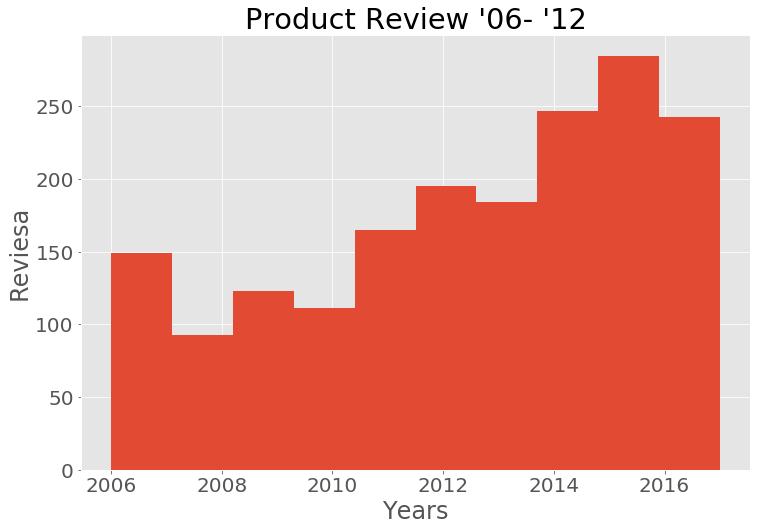

In [74]:
# Use choc dataframe
# focus on the Review Data column
# accomodate Review Date having carriage return in name
# plot with the kind of 'hist'
# configure for 10 bins
# add plt labels
choc['Review\nDate'].plot(kind='hist', bins = 10)
plt.ylabel('Reviesa')
plt.xlabel('Years')
plt.title("Product Review '06- '12")

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


Scatter plots are very good at showing the **interaction between two numeric variables** (especially when they're continuous)!

In [79]:
# View avo's beginning rows
avo.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Oh snap! What did we just make?! It's a [price elasticity curve!](https://en.wikipedia.org/wiki/Price_elasticity_of_demand)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/36/Marshall_PED.png" align="left">

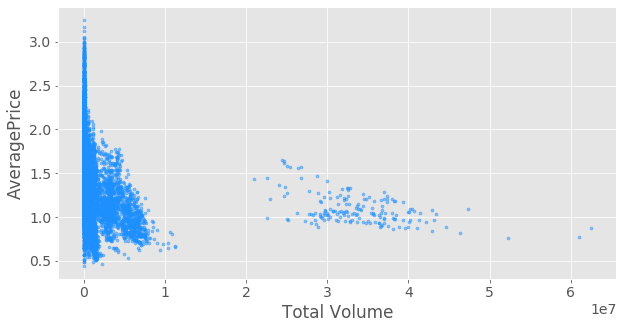

In [90]:
#Create scatter plot using avo data
#Show x as 'Total Volume' and y as 'AveragePrice'
#Assign color as 'dodgerblue'
#also add the following figsize=(10,4), s=10, alpha=0.5
avo.plot(kind='scatter', x="Total Volume", y='AveragePrice', color='dodgerblue', figsize=(10,5), s=10, alpha=0.5)

We can also use a thing called a **scatter matrix** or a **pairplot**, which is a grid of scatter plots. This allows you to quickly **view the interaction of N x M features**. You are generally looking for a trend between variables (a line or curve). Using machine learning, you can fit these curves to provide predictive power.

In [51]:
#use this command, which selects data using iloc
#this phrase becomes the selection core of instructions
#for creating visualizations (without head command)
# refernce row iloc[:,-5:-1]
avo.select_dtypes(include='number').iloc[:,-5:-1].head()

,Total Bags,Small Bags,Large Bags,XLarge Bags
0,8696.87,8603.62,93.25,0.0
1,9505.56,9408.07,97.49,0.0
2,8145.35,8042.21,103.14,0.0
3,5811.16,5677.40,133.76,0.0
4,6183.95,5986.26,197.69,0.0


In [92]:
# iloc_pl=avo.select_dtypes(include='number').iloc[:,-5:-1].head()
# iloc_pl.plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011AF40A4808>,
      dtype=object)

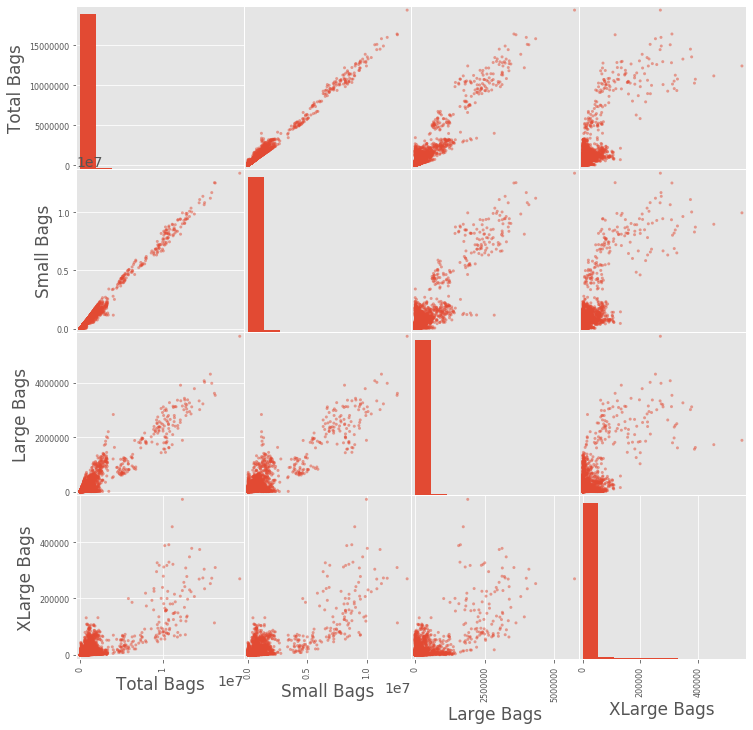

In [97]:
#Create a scatter plot matrix by creating an envelop on the
#data selection above
#open with  pd.plotting.scatter_matrix(
#place data instrutions next
#finish with figsize=(12,12))
pd.plotting.scatter_matrix(
avo.select_dtypes(include='number').iloc[:,-5:-1],
figsize=(12,12))   

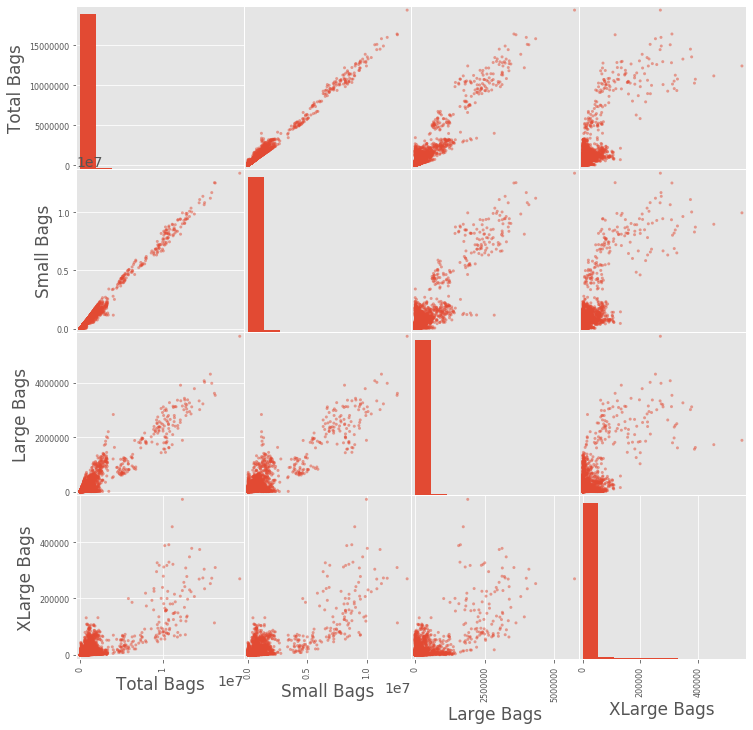

In [96]:
#Create a scatter plot matrix by creating an envelop on the
#data selection above
#open with  pd.plotting.scatter_matrix(
#place data instrutions next
#finish with figsize=(12,12))
pd.plotting.scatter_matrix(
avo.select_dtypes(include='number').iloc[:,-5:-1],
figsize=(12,12))   
plt.show()
    

We can also use a very handy parameter, `c`, which allows us to color the dots in a scatter plot. This is extremely helpful when doing **classification problems**, often you will set the color to the class label.

Let's map the `type` field to the color of the dot in our price elasticity curve. To use the type field, we need to convert it from a string into a number. We can use `pd.Series.apply()` for this.

In [88]:
#Let's map the type field to the color of the dot in our price elasticity curve. 
#To use the type field, we need to convert it from a string into a number. 
#show the unique values for 'type' in avo


We can see we have two unique type labels, `conventional` and `organic`. Although that is the case for this dataset, let's create a function that will store the labels in a dictionary, incrementing the number up by `1` for each new label. This way, if we receive an additional type label in the future, our code won't break. Always think about extensible code!

In [101]:
#Using the dictionary to associate numbers with the 
#text labels
mapping_dict = {}
initial_class_label = 0
for type in list(avo['type'].unique()):
    mapping_dict[type] = initial_class_label
    initial_class_label += 1
mapping_dict

{'conventional': 0, 'organic': 1}

Now we can use this `mapping_dict` dictionary to map the values using `.apply()`:

In [102]:
# gives to have function in lambda x: mapping_dict[x]---..v
avo['type_as_num'] = avo['type'].apply(lambda x: mapping_dict[x])
avo[['type', 'type_as_num']].head(3)

,type,type_as_num
0,conventional,0
1,conventional,0
2,conventional,0


Finally, we can use this **binary class label** as our `c` parameter to gain some insight:

Text(0.5, 0, 'Volume')

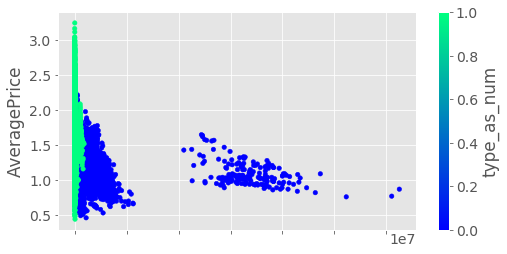

In [104]:
#select avo DataFrame
#use .plot(kind='scatter' ....
#assign 'Total Volume' to x
#assign 'AveragePrice' to y
#assign  c to 'type_as_num' and colormap='winter'
#include figsize=(8,4)
#Create additional command to say "Volume" on xlabel


avo.plot(kind='scatter', x='Total Volume', y='AveragePrice',  
         c='type_as_num', colormap='winter', figsize=(8,4))
plt.xlabel('Volume')

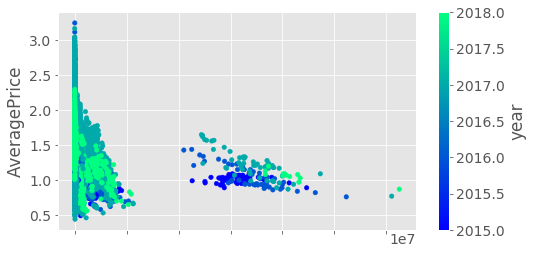

In [106]:
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice',  
         c='year', colormap='winter', figsize=(8,4))
plt.xlabel('Volume')
plt.savefig('./avo_price.png') # if you want to save in place in your OK OK

Amazing! It looks like the organic avocados (value of `1`) totally occupy the lower volume, higher price bracket. Those dang kids with their toast and unicycles driving up the price of my 'cados!

Here, we can also see a 'more' continuous `c` parameter, `year`, (shown below) which makes use of the gradient a little better. There are tons of gradients you can use, check them out [here](https://matplotlib.org/examples/color/colormaps_reference.html).

Finally, we can save the plot to a file, using the `plt.savefig()` method:

In [83]:
# plt.rcParams['figure.figsize'] = (8, 6)
# plt.rcParams['font.size'] = 14

In [91]:
#recreate the scatter plot above, but change c='year'
#observe the change in visual message

#Add the command to save the picture
#plt.savefig('./avo_price.png');

<a id="summary"></a>
### Summary

In this lesson, we showed examples of how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Scatter plots

### Additional Resources

Always read the documentation!

- [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

- [Matplotlib Documentation](https://matplotlib.org/)

- [Matplotlib sample plots](https://matplotlib.org/tutorials/introductory/sample_plots.html)